### 项目描述
Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

Rossmann公司在7个欧洲国家一共拥有3000家药妆店。目前Rossmann商店经理需要预测未来6周的销售额。商店的销售额会受到许多因素的影响，包括促销，竞争对手，学校，节假日，季度和区域性。由上千位背景不同的经理基于他们的环境而预测出的销售额差别是非常大的。

In their first Kaggle competition, Rossmann is challenging you to predict 6 weeks of daily sales for 1,115 stores located across Germany. Reliable sales forecasts enable store managers to create effective staff schedules that increase productivity and motivation. By helping Rossmann create a robust prediction model, you will help store managers stay focused on what’s most important to them: their customers and their teams! 

在Rossmann的第一次Kaggle竞赛中，它需要你为它预测德国境内的1115家药妆店6周内每天的销售额。可靠的销售额可以激发员工的工作积极性和产出。通过帮助Rossmann创建一个可靠，强壮的预测模型，你可以帮助Rossmann的经理们关注对他们来说最重要的东西：客户和团队。


### 问题描述
  项目选自Kaggle的一个竞赛项目 [Rossmann Store Sales](https://www.kaggle.com/c/rossmann-store-sales)，目标是预测Rossmann的销售额。是一个监督学习的回归类的问题，可以用LinearRegression，XGBoost，神经网络等机器学习的算法来预测销售额。
  
### 数据集的下载
数据全部可以从[Kaggle](https://www.kaggle.com/c/rossmann-store-sales/data)上下载。一共提供了4个文件：

- train.csv - historical data including Sales (训练集，包括了销售额)
- test.csv - historical data excluding Sales （测试集，没有包括销售额）
- sample_submission.csv - a sample submission file in the correct format （最终需要提交的文件模板）
- store.csv - supplemental information about the stores （补充信息）

#### 数据描述

- Id - an Id that represents a (Store, Date) duple within the test set（测试集中的唯一索引，由商店和日期表示，可以理解为数据库中的联合主键）
- Store - a unique Id for each store （商店的唯一索引）
- Sales - the turnover for any given day (this is what you are predicting) （销售额，需要在测试集中预测）
- Customers - the number of customers on a given day （当天的客户数量）
- Open - an indicator for whether the store was open: 0 = closed, 1 = open （是否营业，0.否 1.是）
- StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None （法定假日，大部分商店都会放假，但也有些列外，a = 公共假日，b = 复活节，c = 圣诞节， 0 = 无）
- SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools （学校假日，代表商店是否收到学校临时停课的影响）
- StoreType - differentiates between 4 different store models: a, b, c, d （商店类型）
- Assortment - describes an assortment level: a = basic, b = extra, c = extended （商店分类级别，a = 基本，b = 额外， c = 扩展）
- CompetitionDistance - distance in meters to the nearest competitor store （最近的竞争者的距离，单位：米）
- CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened （最近的竞争者，开始营业的月及年份）
- Promo - indicates whether a store is running a promo on that day （当天是否有促销）
- Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating（持续促销， 0 = 未参与， 1 = 参与）
- Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2 （持续促销开始的年/周数）
- PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store （促销的间隔）

至此我对项目有了一个大概的了解，接下来我们需要对数据进行探索。

### 数据的探索

- 首先利用pandas的API读取train,store,test3个文件，然后调用df的head方法，快速浏览下数据；
- train存放的是1151个商店在不同时期的销售额，而store存放的是各个商店的一些特征，test自然存放的是测试集；
- 为了方便训练和预测，我们需要将train和test与store特征进行合并，但在合并之前我们需要对数据做一些预处理操作；

In [50]:
from sklearn.preprocessing import MinMaxScaler
import math
import pandas as pd
import seaborn as sns
import numpy as np
import datetime

%matplotlib inline
sns.set(color_codes=True)

train = pd.read_csv('data/train.csv')
store = pd.read_csv('data/store.csv')
test = pd.read_csv('data/test.csv')

C:\Users\EWWIQQU\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [12]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


### 数据预处理 - Store
- 首先我们对store文件里的特征进行预处理，我们依次来看下每个特征，是否需要处理
- Store，商店的ID，这个我们暂时先不做预处理操作。因为在merge2个dataframe的时候会用它作为key。
- StoreType，商店类型，需要独热编码；
- Assortment，销售种类，需要独热编码；
- CompetitionDistance，竞争对手距离，首先需要处理空值，再查看分布图，确定是否需要做对数处理，然后再做归一化处理；
- CompetitionOpenSinceYeah，竞争对手营业年份，需要处理空值，再查看分布图，确定是否需要做对数处理，然后再做归一化处理；
- Promo2，是否有持续促销，不做任何处理；
- PromoSinceWeek，第几周开始促销的，需要处理空值，再查看分布图，确定是否需要做对数处理，然后再做归一化处理；
- Promo2SinceYear，哪一年开始促销的，需要处理空值，再查看分布图，确定是否需要做对数处理，然后再做归一化处理；
- PromoInterval，促销的间隔（由英文的月份表示），需要处理空值，同时需要拆分成多个属性，拆分成多个属性后需要进行独热编码；

C:\Users\EWWIQQU\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


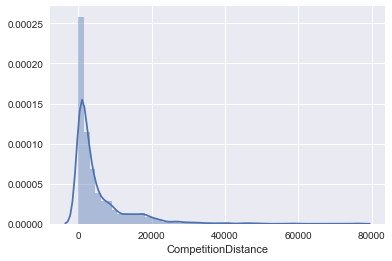

In [51]:
# 首先处理store中可能为NaN的特征，这里如果为NaN，赋值为0
store['CompetitionDistance'] = store['CompetitionDistance'].apply(lambda x: 0 if math.isnan(x) else x)
store['CompetitionOpenSinceMonth'] = store['CompetitionOpenSinceMonth'].apply(lambda x: 0 if math.isnan(x) else x)
store['CompetitionOpenSinceYear'] = store['CompetitionOpenSinceYear'].apply(lambda x: 0 if math.isnan(x) else x)
store['Promo2SinceWeek'] = store['Promo2SinceWeek'].apply(lambda x: 0 if math.isnan(x) else x)
store['Promo2SinceYear'] = store['Promo2SinceYear'].apply(lambda x: 0 if math.isnan(x) else x)

# plot出CompetitionDistance的分布图
sns.distplot(store['CompetitionDistance']);

In [52]:
# 处理完NaN的数据后，查看CompetitionDistance的分布图，发现CompetitionDistance 数据倾斜很明显，需要对数处理
store['CompetitionDistance'] = store['CompetitionDistance'].apply(lambda x: np.log(x + 1))

# 处理PromoInterval，这个值比较特殊，这个值一共有以下4种情况 (print(store['PromoInterval'].drop_duplicates()) )
# Feb,May,Aug,Nov 
# Jan,Apr,Jul,Oct
# Mar,Jun,Sept,Dec
# NaN
# 我们可以把NaN的当做一种情况，这里我的处理方法是如果为NaN则赋值 None,None,None,None
# 这样做的好处是，结构上保持和其他三种情况一致，代码处理起来会方便很多
store['PromoInterval'] = store['PromoInterval'].apply(lambda x: x if type(x) == str else 'None,None,None,None')
# 处理按空值后，可以开始拆分属性，这里可以根据逗号一共拆成4个属性，第一次促销开始月份，第二次促销开始月份，以此类推
store['PromoInterval_1'] = store['PromoInterval'].apply(lambda x: x.split(',')[0])
store['PromoInterval_2'] = store['PromoInterval'].apply(lambda x: x.split(',')[1])
store['PromoInterval_3'] = store['PromoInterval'].apply(lambda x: x.split(',')[2])
store['PromoInterval_4'] = store['PromoInterval'].apply(lambda x: x.split(',')[3])
# 拆分属性完成后，可以丢弃掉属性PromoInterval
store = store.drop(['PromoInterval'], axis = 1)
# 对以下column做归一化操作，初始化一个 scaler，并将它施加到特征上
scaler = MinMaxScaler()
numerical = ['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']
store[numerical] = scaler.fit_transform(store[numerical])
# 对剩下的column进行独热编码处理
store = pd.get_dummies(store)
# 调用head方法查看下预处理完之后的数据
store.head()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_a,StoreType_b,StoreType_c,...,PromoInterval_2_May,PromoInterval_2_None,PromoInterval_3_Aug,PromoInterval_3_Jul,PromoInterval_3_None,PromoInterval_3_Sept,PromoInterval_4_Dec,PromoInterval_4_None,PromoInterval_4_Nov,PromoInterval_4_Oct
0,1,0.636093,0.750000,0.996526,0,0.00,0.000000,0,0,1,...,0,1,0,0,1,0,0,1,0,0
1,2,0.564882,0.916667,0.996030,1,0.26,0.997519,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,3,0.850442,1.000000,0.995533,1,0.28,0.998015,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,4,0.572353,0.750000,0.997022,0,0.00,0.000000,0,0,1,...,0,1,0,0,1,0,0,1,0,0
4,5,0.917175,0.333333,1.000000,0,0.00,0.000000,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [34]:
# 再调用describe浏览下数据，
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_a,StoreType_b,StoreType_c,...,PromoInterval_2_May,PromoInterval_2_None,PromoInterval_3_Aug,PromoInterval_3_Jul,PromoInterval_3_None,PromoInterval_3_Sept,PromoInterval_4_Dec,PromoInterval_4_None,PromoInterval_4_Nov,PromoInterval_4_Oct
count,1115.00000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,...,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,558.00000,0.678572,0.410912,0.680367,0.512108,0.241668,0.511285,0.539910,0.015247,0.132735,...,0.116592,0.487892,0.116592,0.300448,0.487892,0.095067,0.095067,0.487892,0.116592,0.300448
std,322.01708,0.142389,0.357077,0.464252,0.500078,0.310845,0.499275,0.498628,0.122587,0.339441,...,0.321077,0.500078,0.321077,0.458659,0.500078,0.293439,0.293439,0.500078,0.321077,0.458659
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,279.50000,0.584397,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,558.00000,0.689685,0.333333,0.995533,1.000000,0.020000,0.997022,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,836.50000,0.786336,0.750000,0.998015,1.000000,0.440000,0.998511,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1115.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 数据预处理 - train and test
- Store的预处理基本到此完成，接下来需要对train和test做预处理，train和test数据内容基本一致，因此处理完train按照同样的方式处理test就行了
- Store，商店的唯一索引，不做处理；
- DayOfWeek，1至7的数字，不做处理；
- Date，日期，需要转换成多个特征，比如年，月，日，一个年的第几周，一个月的第几周，一年的第几天等；
- Sales，销量，提取为标签；
- Customers，当日客户数，直接drop掉；
- Open，是否营业，不做任何处理；
- Promo，是否促销，不做任何处理；
- StateHoliday，是否法定假日，不做任何处理；
- SchoolHoliday，是否学校放假，不做任何处理；

In [53]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [55]:
print(train['StateHoliday'].drop_duplicates())

0         0
63555     a
129340    b
241055    c
327680    0
Name: StateHoliday, dtype: object


In [47]:
def week_of_year(dt):
    return dt.isocalendar()[1]

def week_of_month(dt):
    """ Returns the week of the month for the specified date.
    """
    first_day = dt.replace(day=1)
    dom = dt.day
    adjusted_dom = dom + first_day.weekday()
    return int(math.ceil(adjusted_dom/7.0))

def day_of_year(dt):
    return dt.timetuple().tm_yday

def generate_all_features_in_one_column(x):
    year = x.split('-')[0]
    month = x.split('-')[1]
    date = x.split('-')[2]
    dt = datetime.date(int(year), int(month), int(date))
    woy = week_of_year(dt)
    wom = week_of_month(dt)
    doy = day_of_year(dt)
    return "{}-{}-{}-{}-{}-{}".format(year,month,date,woy,wom,doy)

def split_date(df):
    df['Date'] = df['Date'].apply(lambda x: generate_all_features_in_one_column(x))
    df['Year'] = df['Date'].apply(lambda x: x.split('-')[0])
    df['Month'] = df['Date'].apply(lambda x: x.split('-')[1])
    df['Day'] = df['Date'].apply(lambda x: x.split('-')[2])
    df['WeekOfYear'] = df['Date'].apply(lambda x: x.split('-')[3])
    df['WeekOfMonth'] = df['Date'].apply(lambda x: x.split('-')[4])
    df['DayOfYear'] = df['Date'].apply(lambda x: x.split('-')[5])
    df = df.drop(['Date'], axis=1)

    return df

def preprocess_data(df):
    df = split_date(df)
    # 归一化处理
    numerical = ['Year', 'Month', 'Day', 'WeekOfYear', 'WeekOfMonth','DayOfYear','DayOfWeek']
    df[numerical] = scaler.fit_transform(df[numerical])
    # 独热编码
    df = pd.get_dummies(df)
    return df

train = preprocess_data(train)
train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,WeekOfMonth,DayOfYear,StateHoliday_0,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,0.666667,5263,555,1,1,1,1.0,0.545455,1.0,0.588235,0.8,0.57967,0,1,0,0,0
1,2,0.666667,6064,625,1,1,1,1.0,0.545455,1.0,0.588235,0.8,0.57967,0,1,0,0,0
2,3,0.666667,8314,821,1,1,1,1.0,0.545455,1.0,0.588235,0.8,0.57967,0,1,0,0,0
3,4,0.666667,13995,1498,1,1,1,1.0,0.545455,1.0,0.588235,0.8,0.57967,0,1,0,0,0
4,5,0.666667,4822,559,1,1,1,1.0,0.545455,1.0,0.588235,0.8,0.57967,0,1,0,0,0


In [49]:
print(train['StateHoliday_0'].drop_duplicates())

        StateHoliday_0  StateHoliday_0
0                    0               1
63555                0               0
327680               1               0


In [30]:
test = preprocess_data(test)
test.head()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,WeekOfMonth,DayOfYear,StateHoliday_0,StateHoliday_a
0,1,1,4,1.0,1,0,0.0,1.0,0.533333,1.0,0.4,1.0,1,0
1,2,3,4,1.0,1,0,0.0,1.0,0.533333,1.0,0.4,1.0,1,0
2,3,7,4,1.0,1,0,0.0,1.0,0.533333,1.0,0.4,1.0,1,0
3,4,8,4,1.0,1,0,0.0,1.0,0.533333,1.0,0.4,1.0,1,0
4,5,9,4,1.0,1,0,0.0,1.0,0.533333,1.0,0.4,1.0,1,0


In [18]:
# 提取标签
train_labels = train['Sales']
# 从训练集中移除标签
train = train.drop(['Sales','Customers'], axis=1)
# 合并特征
train = pd.merge(train, store, on='Store')
test = pd.merge(test, store, on='Store')
# 查看训练集合并后的情况
train.head()

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,...,PromoInterval_2_May,PromoInterval_2_None,PromoInterval_3_Aug,PromoInterval_3_Jul,PromoInterval_3_None,PromoInterval_3_Sept,PromoInterval_4_Dec,PromoInterval_4_None,PromoInterval_4_Nov,PromoInterval_4_Oct
0,1,5,1,1,0,1,1.0,0.545455,1.000000,0.588235,...,0,1,0,0,1,0,0,1,0,0
1,1,4,1,1,0,1,1.0,0.545455,0.966667,0.588235,...,0,1,0,0,1,0,0,1,0,0
2,1,3,1,1,0,1,1.0,0.545455,0.933333,0.588235,...,0,1,0,0,1,0,0,1,0,0
3,1,2,1,1,0,1,1.0,0.545455,0.900000,0.588235,...,0,1,0,0,1,0,0,1,0,0
4,1,1,1,1,0,1,1.0,0.545455,0.866667,0.588235,...,0,1,0,0,1,0,0,1,0,0


In [19]:
#测试集合需要drop掉Id这一列
test=test.drop(['Id'], axis=1)
#查看测试集合并后的情况
test.head()

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,...,PromoInterval_2_May,PromoInterval_2_None,PromoInterval_3_Aug,PromoInterval_3_Jul,PromoInterval_3_None,PromoInterval_3_Sept,PromoInterval_4_Dec,PromoInterval_4_None,PromoInterval_4_Nov,PromoInterval_4_Oct
0,1,4,1.0,1,0,0,0.0,1.0,0.533333,1.000000,...,0,1,0,0,1,0,0,1,0,0
1,1,3,1.0,1,0,0,0.0,1.0,0.500000,1.000000,...,0,1,0,0,1,0,0,1,0,0
2,1,2,1.0,1,0,0,0.0,1.0,0.466667,1.000000,...,0,1,0,0,1,0,0,1,0,0
3,1,1,1.0,1,0,0,0.0,1.0,0.433333,1.000000,...,0,1,0,0,1,0,0,1,0,0
4,1,7,0.0,0,0,0,0.0,1.0,0.400000,0.857143,...,0,1,0,0,1,0,0,1,0,0


### 训练模型
- 至此数据准备已经完成，接下来需要挑选一个合适模型来进行训练

In [20]:
# 导入 train_test_split
from sklearn.model_selection import train_test_split

# 将数据切分成训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(train, train_labels, test_size = 0.2, random_state = 0)

# 显示切分的结果
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 813767 samples.
Testing set has 203442 samples.


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

# 初始化回归模型
est = GradientBoostingRegressor(random_state=0)

# 创建需要调节的参数列表
parameters = {'n_estimators':[100,150,200]}

# 创建一个打分对象
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# 在回归模型上使用网格搜索，使用'scorer'作为评价函数
grid_obj = GridSearchCV(est, parameters, scoring=scorer, return_train_score=True, verbose=1)

# 用训练数据拟合网格搜索对象并找到最佳参数
grid_obj.fit(X_train, y_train)

# 得到estimator
best_clf = grid_obj.best_estimator_

print(pd.DataFrame(grid_obj.cv_results_))

best_predictions = best_clf.predict(X_val)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


ValueError: could not convert string to float: 'b'